In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Loading of Bostom dataset

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
housing = fetch_california_housing()

In [4]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

Checking the description of the dataset

In [5]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [6]:
print(housing.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [7]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [8]:
print(housing.target_names)

['MedHouseVal']


Preparing the entire dataset

In [9]:
housing_df = pd.DataFrame(data=housing.data, columns =housing.feature_names)

In [10]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [11]:
housing_df['MedHouseVal']= housing.target

In [12]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


Exploratory Data analysis

In [13]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [14]:
housing_df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [15]:
#Summarizingthe dataset
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


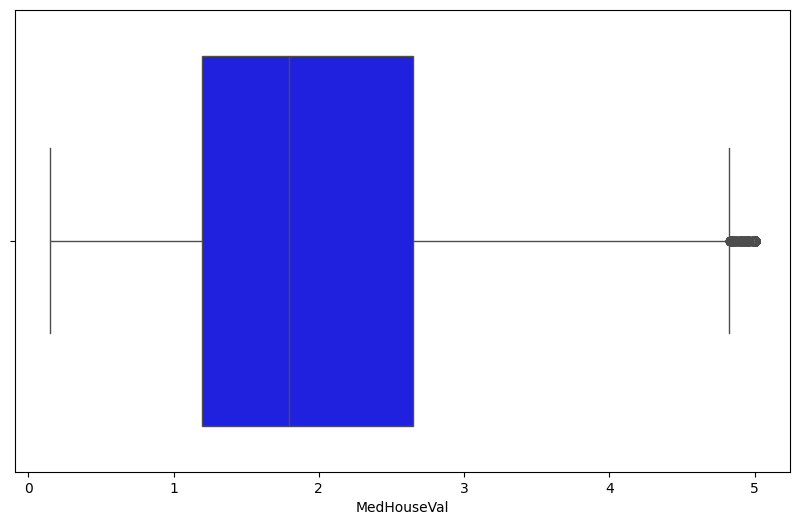

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(x='MedHouseVal', data=housing_df, color='blue')
plt.show()

In [17]:
#removing the outliers
q1 = housing_df['MedHouseVal'].quantile(0.25)
q3 = housing_df['MedHouseVal'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 - 1.5* iqr



In [18]:
housing_df = housing_df[(housing_df['MedHouseVal']>=lower_bound) & (housing_df['MedHouseVal']>=upper_bound)]

In [19]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


<Axes: xlabel='MedHouseVal'>

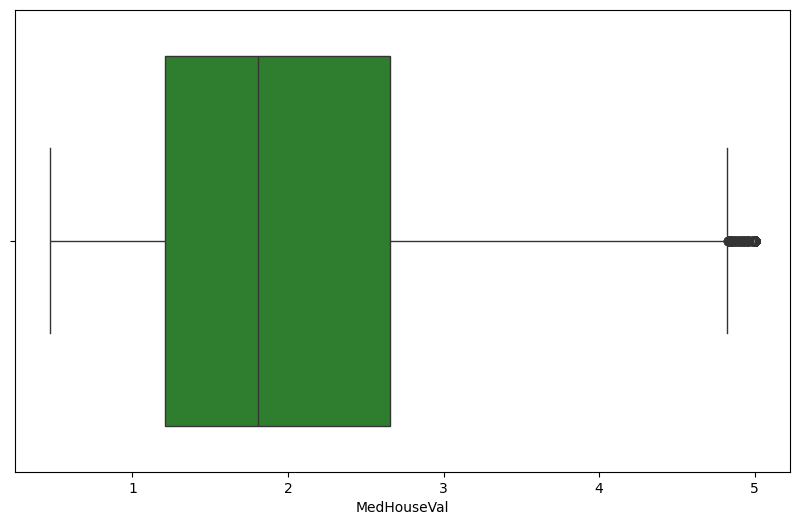

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(x='MedHouseVal', data=housing_df, color= 'forestgreen')

In [21]:
corre_matric = housing_df.corr()

In [22]:
np.round(corre_matric, 2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.00,-0.12,0.33,-0.06,0.00,0.02,-0.08,-0.01,0.69
HouseAge,-0.12,1.00,-0.15,-0.08,-0.30,0.01,0.01,-0.11,0.11
AveRooms,0.33,-0.15,1.00,0.85,-0.07,-0.00,0.11,-0.03,0.15
AveBedrms,-0.06,-0.08,0.85,1.00,-0.06,-0.01,0.07,0.01,-0.04
Population,0.00,-0.30,-0.07,-0.06,1.00,0.07,-0.11,0.10,-0.03
AveOccup,0.02,0.01,-0.00,-0.01,0.07,1.00,0.00,0.00,-0.02
Latitude,-0.08,0.01,0.11,0.07,-0.11,0.00,1.00,-0.93,-0.14
Longitude,-0.01,-0.11,-0.03,0.01,0.10,0.00,-0.93,1.00,-0.04
MedHouseVal,0.69,0.11,0.15,-0.04,-0.03,-0.02,-0.14,-0.04,1.00


<Axes: >

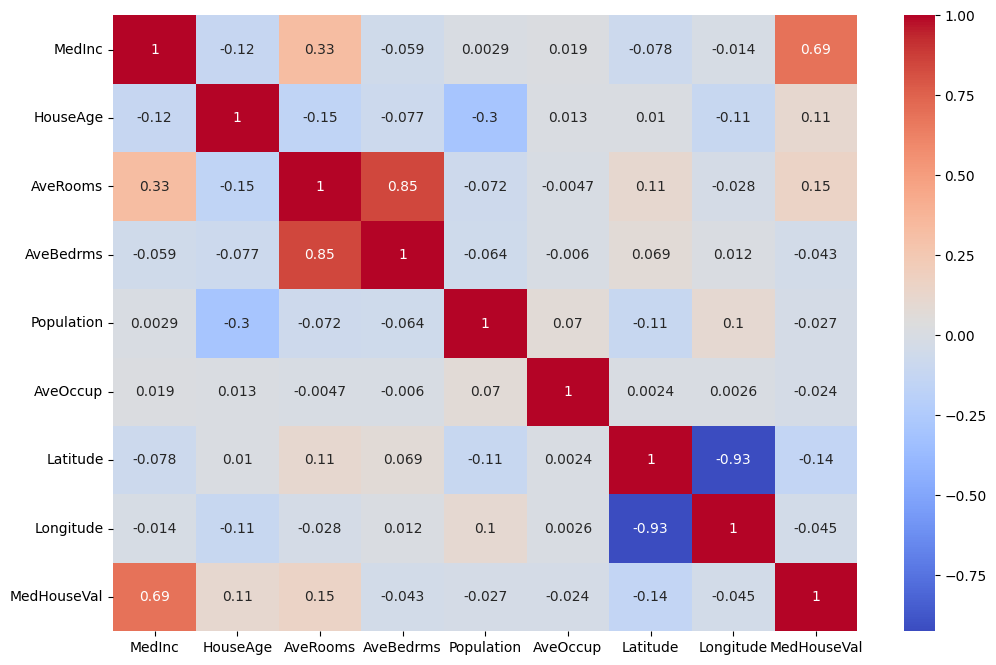

In [23]:
plt.figure(figsize = (12,8))
sns.heatmap(corre_matric, annot=True, cmap='coolwarm')

<Figure size 1200x800 with 0 Axes>

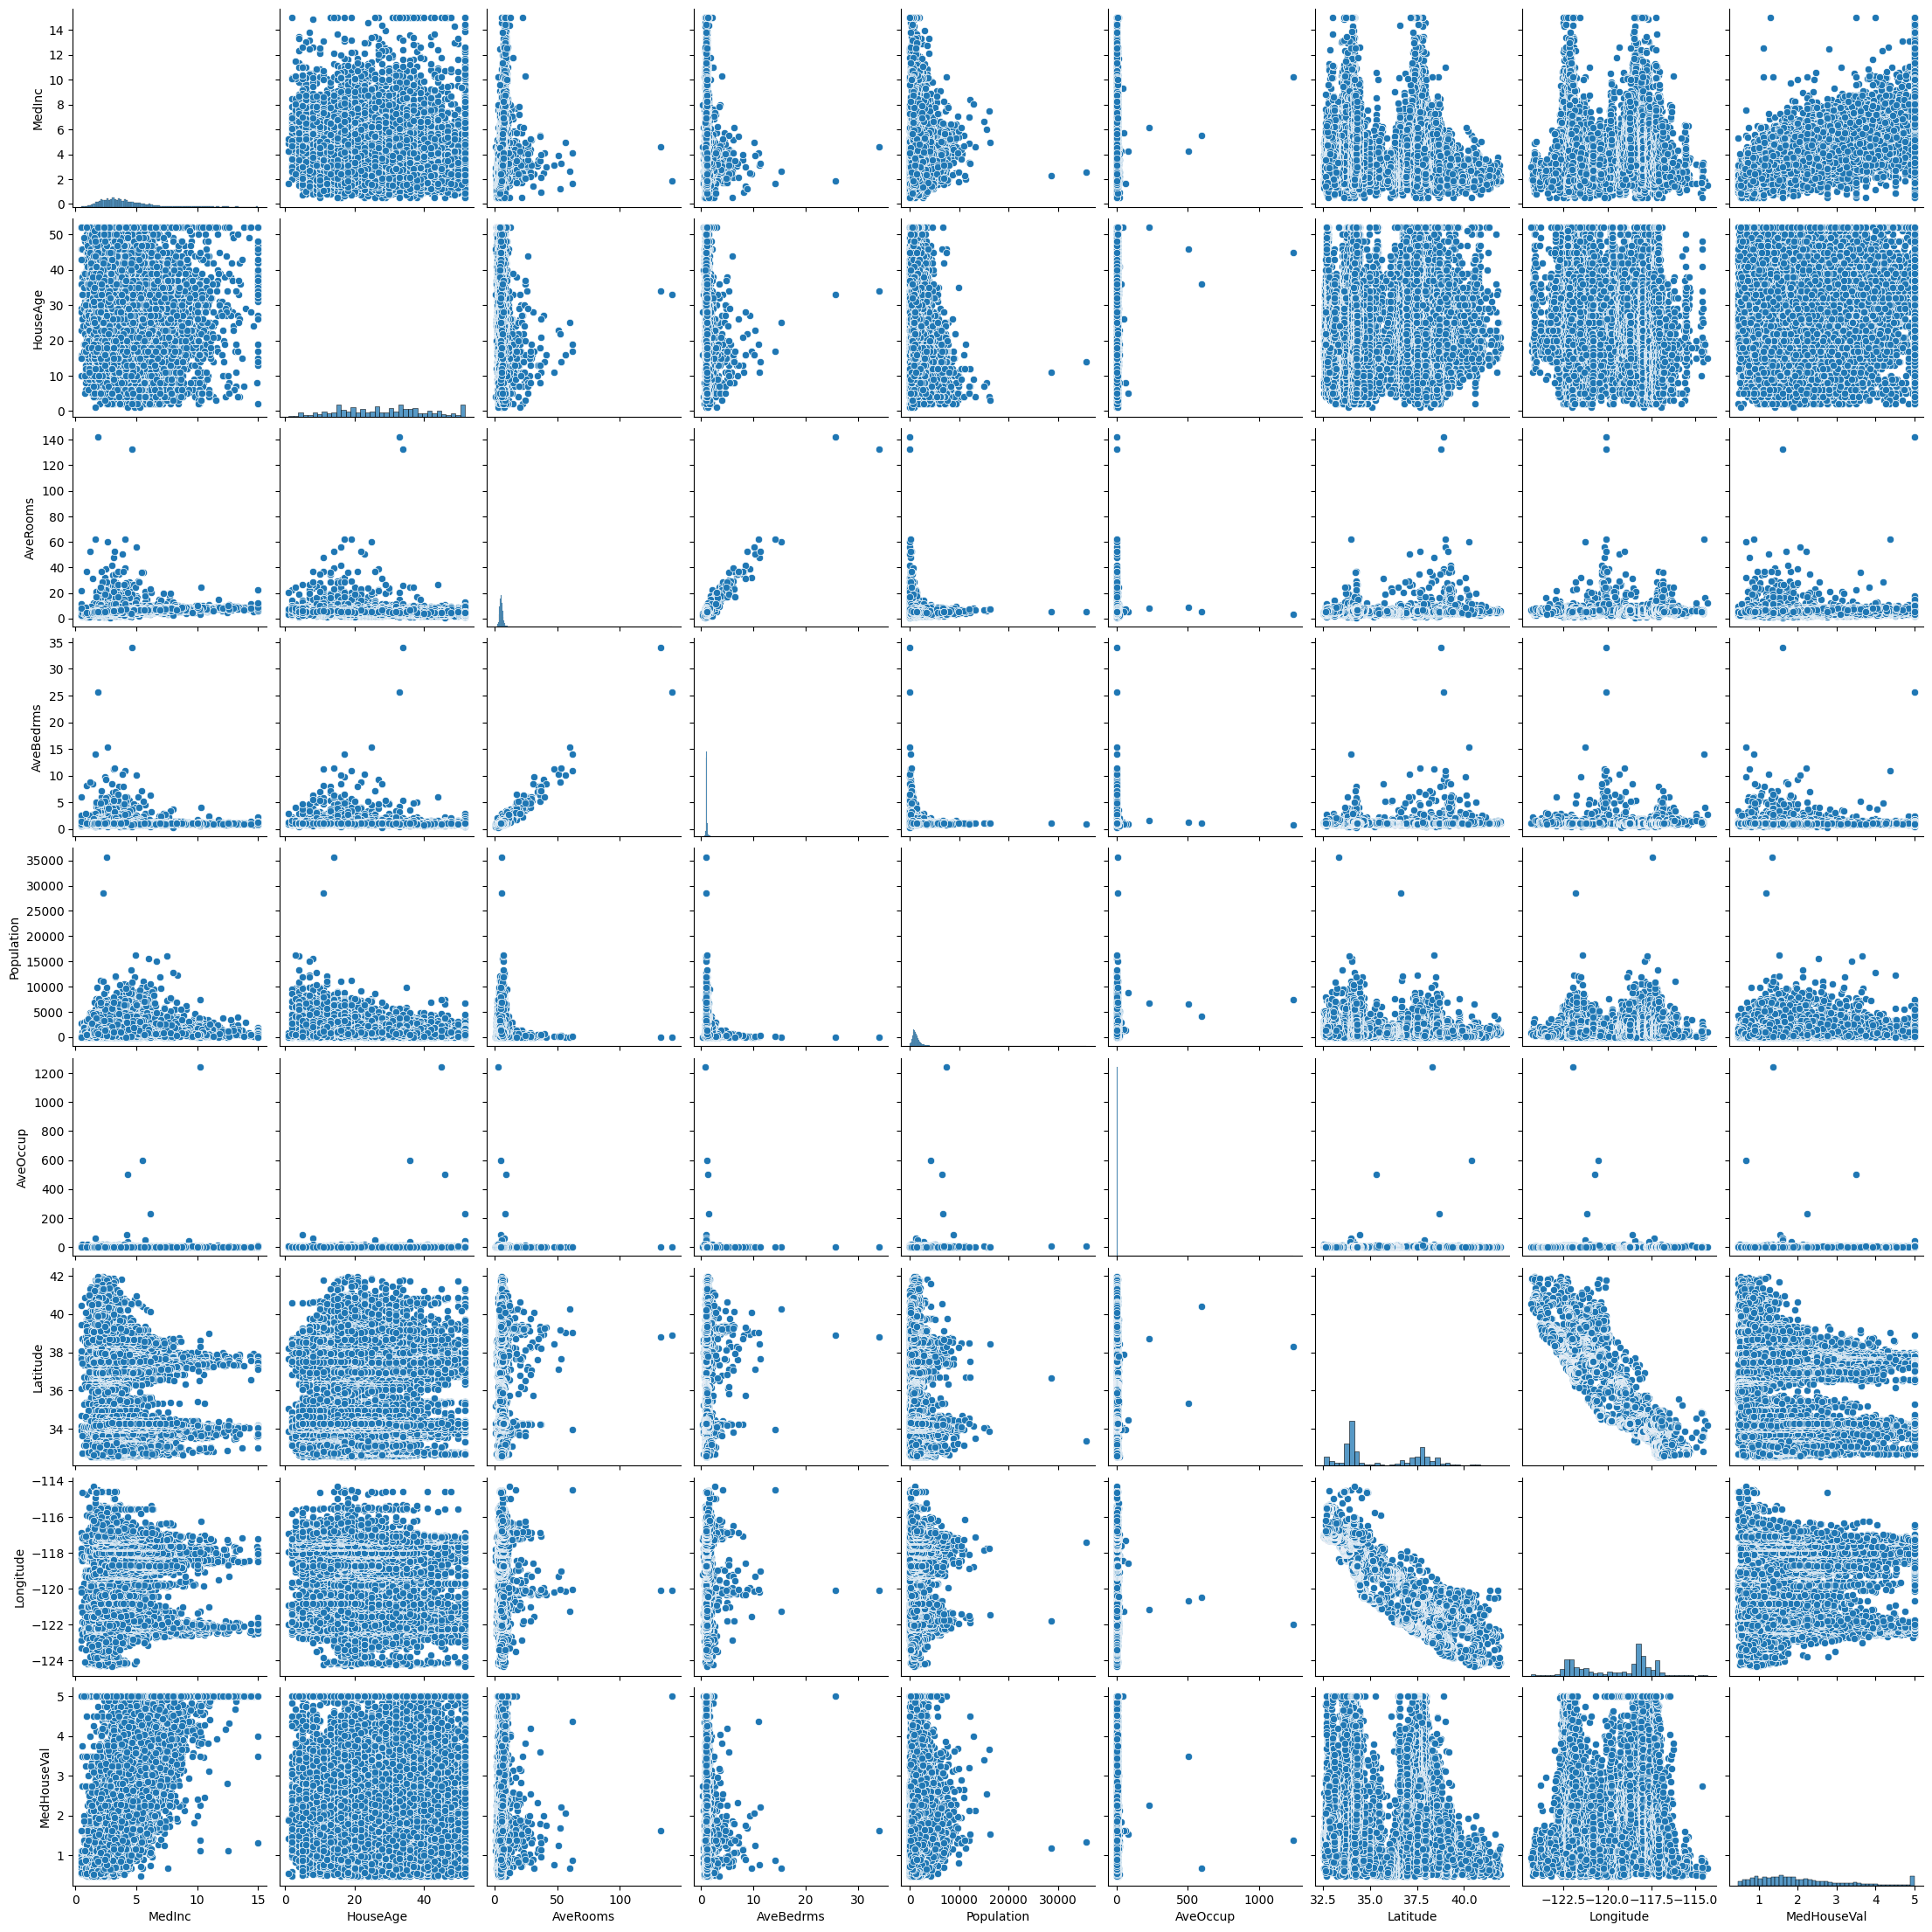

In [24]:
plt.figure(figsize=(12,8))
sns.pairplot(housing_df)

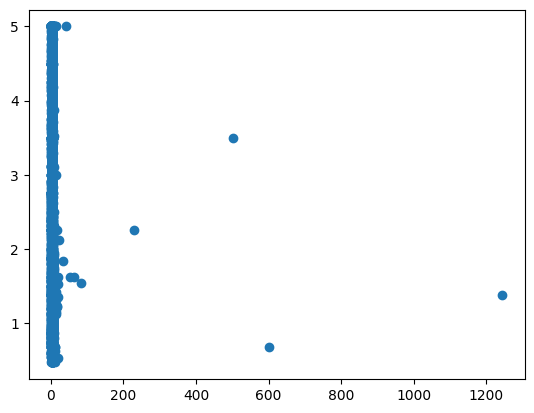

In [25]:
plt.scatter(housing_df['AveOccup'], housing_df['MedHouseVal'])

<Axes: xlabel='AveOccup', ylabel='MedHouseVal'>

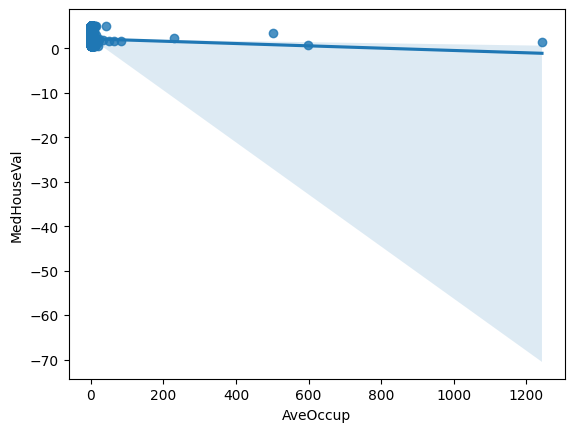

In [26]:
sns.regplot(x='AveOccup', y='MedHouseVal', data=housing_df)


<Axes: xlabel='MedInc', ylabel='MedHouseVal'>

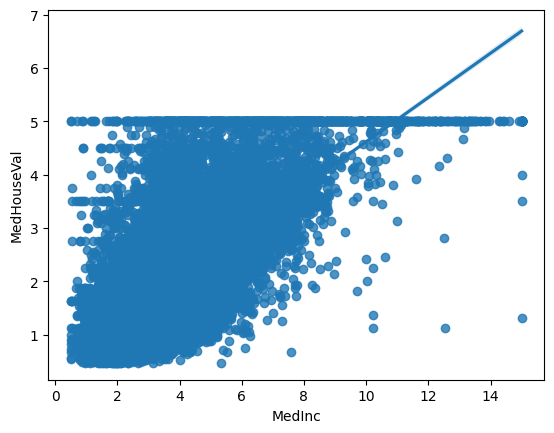

In [27]:
sns.regplot(x='MedInc', y='MedHouseVal', data=housing_df)

In [28]:
# Dviving the data into independent and dependent features
x = housing_df.iloc[:, :-1]
y = housing_df.iloc[:,-1]

In [29]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [30]:
# Spliiting the data - Train and test split
from sklearn.model_selection import train_test_split


In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [32]:
x_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
6621,3.7159,52.0,5.788644,1.041009,777.0,2.451104,34.17,-118.12
13492,3.0250,17.0,5.639053,0.988166,1550.0,4.585799,34.04,-117.40
7586,1.8095,31.0,4.129094,1.005780,2276.0,4.385356,33.90,-118.23
18577,2.4375,20.0,4.790741,1.012963,1534.0,2.840741,36.93,-121.77
483,2.6914,52.0,4.846575,1.019178,849.0,2.326027,37.86,-122.27
...,...,...,...,...,...,...,...,...
11359,2.1838,18.0,3.578603,1.072052,2513.0,5.486900,33.74,-117.92
12041,3.6071,7.0,4.887775,1.068768,5271.0,2.517192,33.90,-117.49
5459,2.8417,34.0,3.564639,0.952471,1491.0,2.834601,33.99,-118.47
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [33]:
#standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [34]:
x_train = scaler.fit_transform(x_train)

In [35]:
x_test = scaler.transform(x_test)

In [60]:
import pickle
#saving the model 
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [36]:
import statsmodels.api as sm

In [37]:
x_value_sm = housing_df.iloc[:, :-1]
y_value_sm = housing_df.iloc[:, -1]

In [38]:
x_sm= sm.add_constant(x_value_sm)
model = sm.OLS(y_value_sm, x_sm).fit()

In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     3912.
Date:                Sat, 27 Sep 2025   Prob (F-statistic):               0.00
Time:                        18:09:22   Log-Likelihood:                -22471.
No. Observations:               20515   AIC:                         4.496e+04
Df Residuals:                   20506   BIC:                         4.503e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.1387      0.666    -55.768      0.000     -38.444     -35.833
MedInc         0.4358      0.004    103.489      0.000       0.428       0.444
HouseAge       0.0095      0.000     21.202      0.000       0.009       0.010
AveRooms      -0.1087      0.006    -18.359      0.000      -0.120      -0.097
AveBedrms      0.6541      0.028     23.088      0.000       0.599       0.710
Population  -3.83e-06   4.77e-06     -0.802      0.422   -1.32e-05    5.53e-06
AveOccup      -0.0038      0.000     -7.732      0.000      -0.005      -0.003
Latitude      -0.4235      0.007    -58.179      0.000      -0.438      -0.409
Longitude     -0.4368      0.008    -57.344      0.000      -0.452      -0.422
==============================================================================
Omnibus:                     4396.553   Durbin-Watson:                   0.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14209.917
Skew:                           1.087   Prob(JB):                         0.00
Kurtosis:                       6.450   Cond. No.                     2.40e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model Training

In [40]:
from sklearn.linear_model import  LinearRegression
regressor = LinearRegression()

In [41]:
regressor.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [42]:
print(regressor.coef_)

[ 0.81107476  0.11778409 -0.25762468  0.30467363 -0.00342576 -0.0393243
 -0.90495832 -0.87669905]


In [43]:
print(regressor.intercept_)

2.0755140531318554


In [44]:
reg_pred = regressor.predict(x_test)

In [45]:
reg_pred

array([1.25973902, 1.67083238, 2.75241351, ..., 1.09302681, 1.70733987,
       2.7279856 ], shape=(4103,))

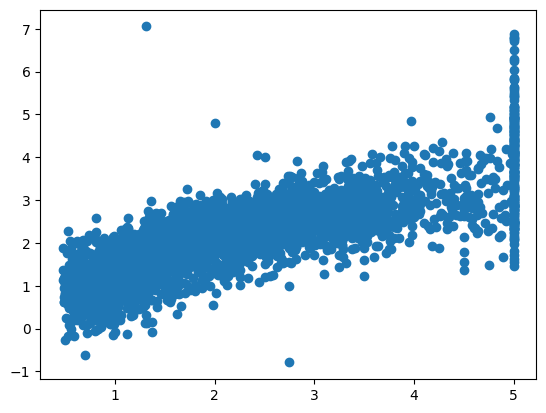

In [46]:
# Plot a scatter plot for the prediction
plt.scatter(y_test, reg_pred)

In [47]:
# Residual basically mean error in y test and the predicted model

residual = y_test - reg_pred
residual

19954   -0.589739
19265   -0.208832
8312     1.199586
8743     0.744277
4593     0.676280
           ...   
19711    0.359775
11130   -0.028258
9039     0.406973
6258    -0.121340
16152    0.757014
Name: MedHouseVal, Length: 4103, dtype: float64

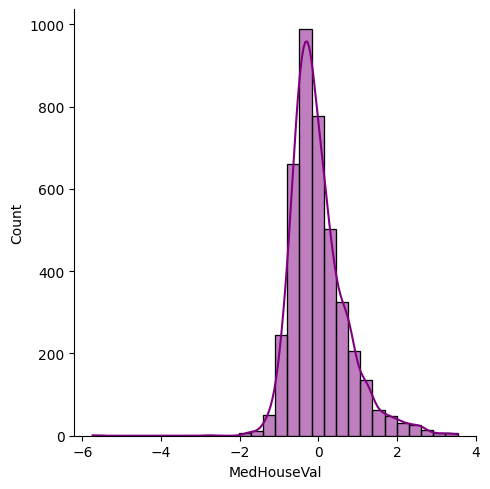

In [48]:
#plot the residual

sns.displot(residual, kde=True, color='purple', bins=30)

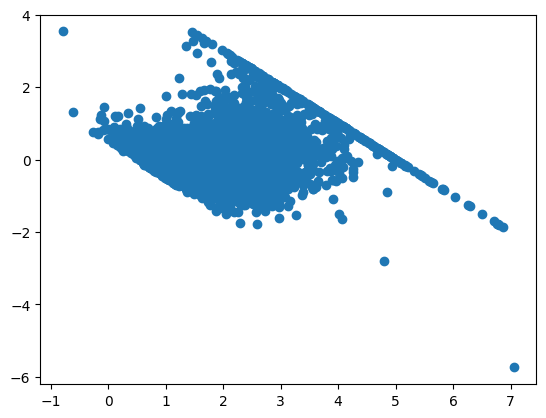

In [49]:
# Scatter pot with respect to predicted value and residuals
plt.scatter(reg_pred, residual)

In [50]:
# Performance metrices
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [51]:
print(mean_absolute_error(y_test, reg_pred))
print(mean_squared_error(y_test, reg_pred))
print(np.sqrt(mean_squared_error(y_test, reg_pred)))
print(r2_score(y_test, reg_pred))

0.5321893715864249
0.5147400067561125
0.7174538359756065
0.6197728497772246


New Prediction

In [52]:
First_data = housing.data[0].reshape(1, -1)

In [62]:
print(First_data)
print(housing.feature_names)

[[   8.3252       41.            6.98412698    1.02380952  322.
     2.55555556   37.88       -122.23      ]]
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [53]:
First_data_pred = scaler.transform(First_data)

c:\Users\Hezekay PC\Documents\Project Practice\Data Science Journey\CalifoniaHousingPricing\House_price_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [54]:
np.round(regressor.predict(First_data_pred), 2)

array([4.11])

Pickling the Model file for deployment

In [55]:
import pickle

In [56]:
pickle.dump(regressor, open('regmodel.pkl', 'wb'))

In [57]:
pickeled_model = pickle.load(open('regmodel.pkl', 'rb'))

In [58]:
np.round(pickeled_model.predict(First_data_pred),2)

array([4.11])